<a href="https://colab.research.google.com/github/tirzors07/KDD/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Abrir y cargar el dataset
with open('/content/drive/My Drive/KDD_2025-1/IRIS/iris.csv', 'r') as file:
    df = pd.read_csv(file)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from tabulate import tabulate

In [ ]:
#informacion del dataset
print("atributos\n")
df.info()
df['species'].value_counts()

atributos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
#primeras 6 instancias
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [ ]:
print("¿Faltan datos?")
df.isnull().sum()

¿Faltan datos?


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Text(0.5, 0.98, '\nDistribucion de los atributos del dataset')

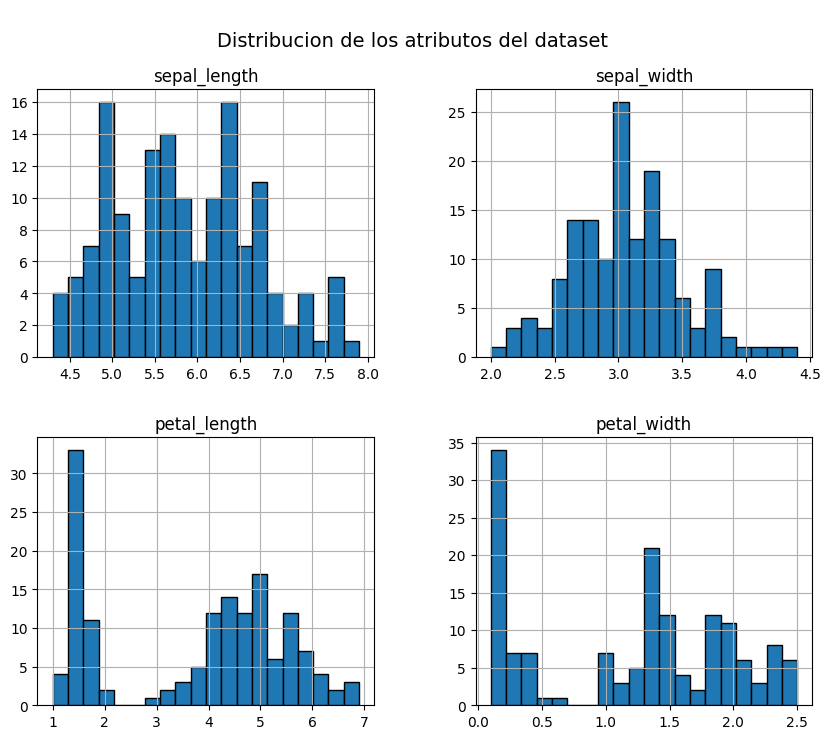

In [ ]:
#histograma de como estan distribuidos los datos
df.hist(figsize=(10,8),bins=20,edgecolor = 'black')
plot.suptitle("\nDistribucion de los atributos del dataset",fontsize = 14)

In [ ]:
#medidas estadisticas
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#print("Media")
df.select_dtypes(include=['number']).mean()

,0
sepal_length,5.843333
sepal_width,3.054000
petal_length,3.758667
petal_width,1.198667


In [ ]:
#medidas estadisticas
print("Mediana")
df.select_dtypes(include=['number']).median()

Mediana


,0
sepal_length,5.80
sepal_width,3.00
petal_length,4.35
petal_width,1.30


In [ ]:
#medidas estadisticas
print("Moda")
df.select_dtypes(include=['number']).mode().iloc[0]

Moda


,0
sepal_length,5.0
sepal_width,3.0
petal_length,1.5
petal_width,0.2


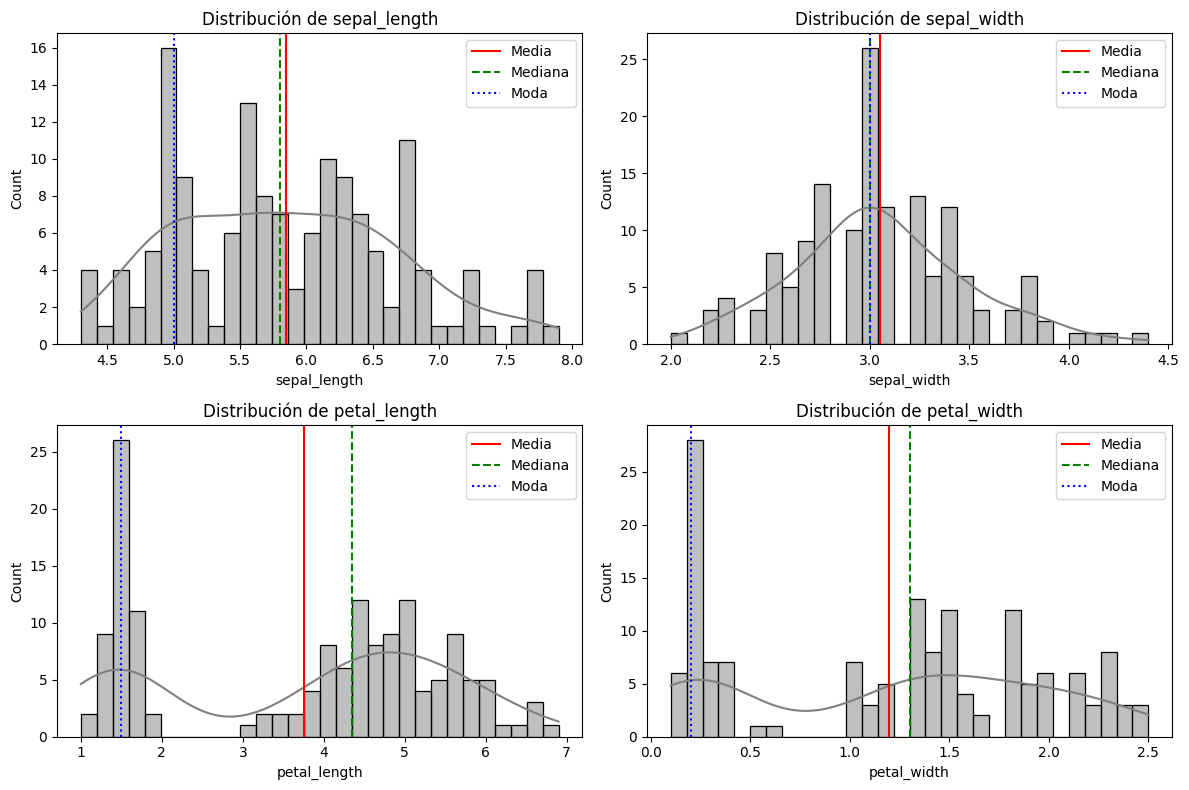

Asimetria
 sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64


In [ ]:
# Configurar sub-graficos
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns
num_vars = len(num_cols)
#imprimir garficamente media, mediana y moda
# Definir numero de filas y columnas
ncols = 2 #dos columnas para mejor visualizacion
nrows = int(np.ceil(num_vars / ncols))  #calcular num de filas necesarias

# Crear la figura y los sub.-graficos
fig, axes = plot.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))
axes = axes.flatten()  # Convertir en una lista para iterar fácilmente

#grafica cada var numerica
for i, col in enumerate(num_cols):
    data = df[col].dropna()  #eliminar NaN para evitar problemas
    mean = data.mean()
    median = data.median()
    mode = data.mode().iloc[0] if not data.mode().empty else mean  # Primera moda o media si no hay moda

    #histograma
    sns.histplot(data, bins=30, kde=True, color="gray", ax=axes[i])

    #lineas para Media, Mediana y Moda
    axes[i].axvline(mean, color='r', linestyle='-', label='Media')
    axes[i].axvline(median, color='g', linestyle='--', label='Mediana')
    axes[i].axvline(mode, color='b', linestyle=':', label='Moda')

    #labels
    axes[i].set_title(f"Distribución de {col}")
    axes[i].legend()

# eliminar subgraficos vacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#ajuste dieseño y mostrar grafica
plot.tight_layout()
plot.show()
#asimetria(numerico)
print("Asimetria\n",df.select_dtypes(include=['number']).skew())# Valores positivos indican sesgo a la derecha, negativos a la izquierda.

Text(0.5, 0.98, 'Diagrama de Cajas para Detectar Outliers')

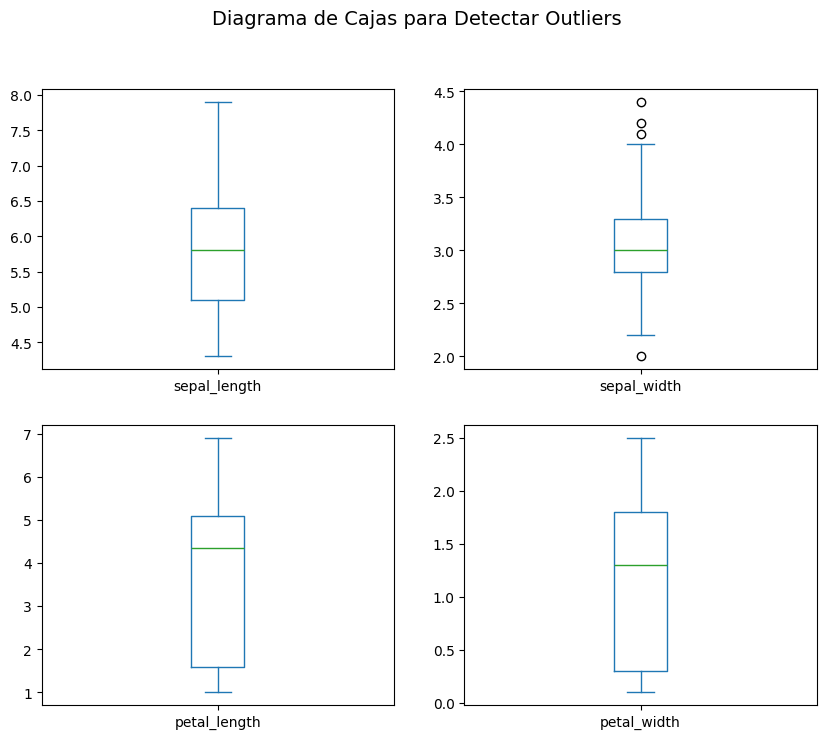

In [ ]:
#outliers y diagrama de cajas
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,8), sharex=False, sharey=False)
plot.suptitle("Diagrama de Cajas para Detectar Outliers", fontsize=14)
#plot.show()

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


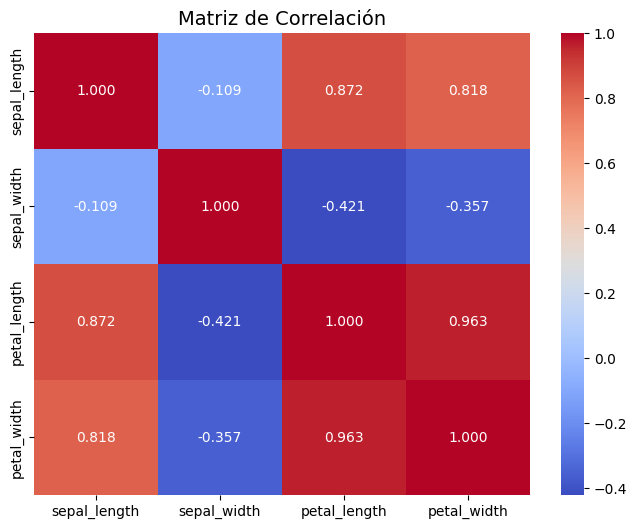

In [ ]:
# Matriz de correlacion
df.select_dtypes(include=['number']).corr()
df_numeric = df.select_dtypes(include=['number'])
plot.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".3f")#
plot.title("Matriz de Correlación", fontsize=14)
plot.show()

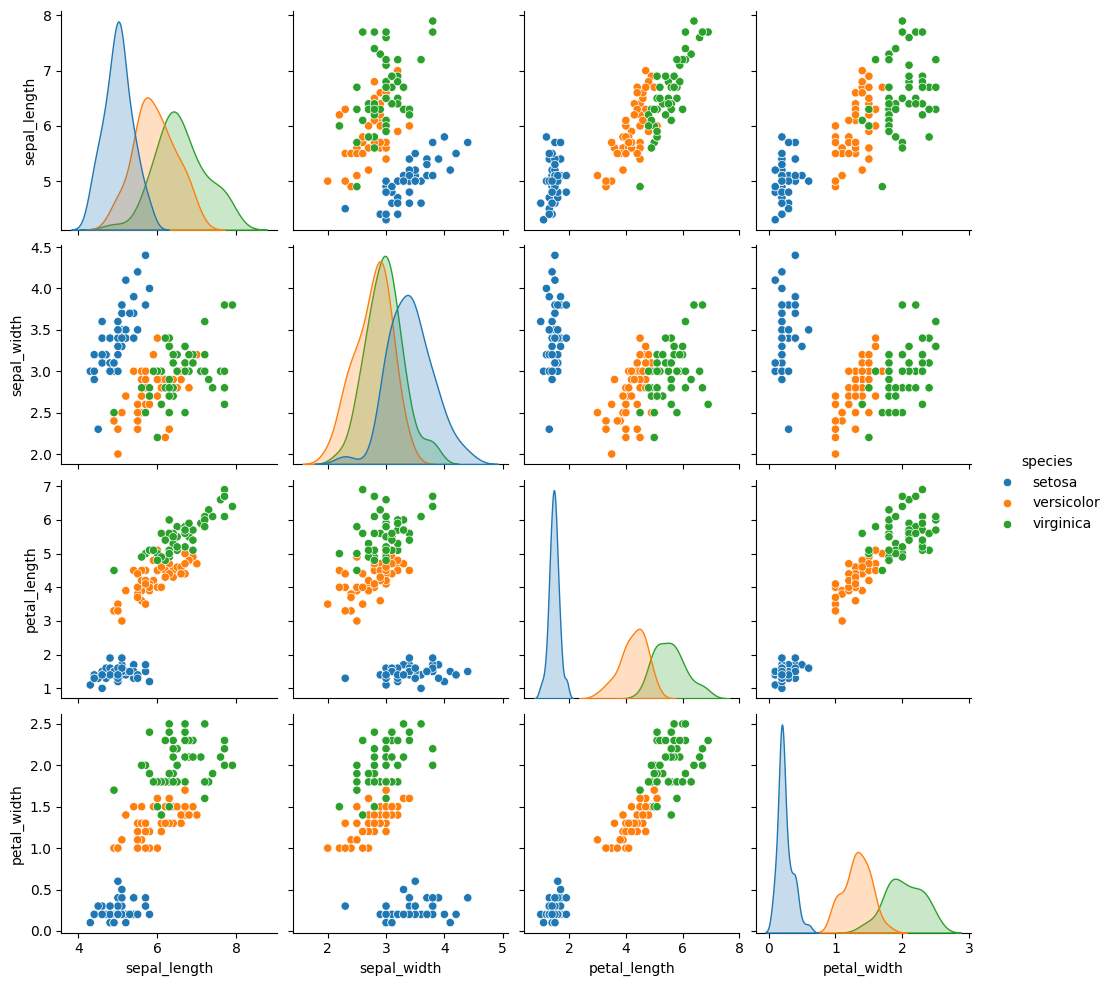

In [ ]:
# Pair plot for visualization
sns.pairplot(df, hue='species')
plot.show()